In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Data/dataset_1L.csv")
df.head()

,ID,Title,Post,Flair,Upvote,Downvote,comments,Media,Month,Year
0,g1tpq5,"Watch | ""Have to fill our stomach"": Migrant wo...",NaN,Coronavirus,26,0,2,4,4,2020
1,g1tm26,Need carrier advice.,I'm a second year CS student. What should I le...,AskIndia,6,0,3,0,4,2020
2,g1tfmd,Airlines Cancellation Policy?,Hi Guys \t\tSince the lockdown has extended an...,AskIndia,7,0,7,0,4,2020
3,g1tbx6,The secret to getting votes* ft. BJP,[deleted],Politics,1,0,0,0,4,2020
4,g1taa4,‘Bhilwara model’ loses its way in Jaipur’s con...,NaN,Coronavirus,23,0,1,0,4,2020


In [4]:
month = {1:"Jan",
         2:"Feb",
         3:"Mar",
         4:"Apr",
         5:"May",
         6:"Jun",
         7:"Jul",
         8:"Aug",
         9:"Sep",
        10:"Oct",
        11:"Nov",
        12:"Dec"}
func = lambda x,y : month[x] + ","+ str(y)
m = list(map(func, df["Month"],df["Year"]))
df["Time"] = m

In [5]:
time = np.array([ 'Sep,2019','Oct,2019','Nov,2019','Dec,2019','Jan,2020','Feb,2020','Mar,2020','Apr,2020'])
flair = np.unique(df["Flair"])
time_flair_count = pd.DataFrame(([[df[(df["Flair"] == i) & (df["Time"] == j)].shape[0] for i in flair] for j in time]),index = time,columns= flair)
time_flair_count

,AskIndia,CAA-NRC,Coronavirus,Food,Non-Political,Photography,Policy/Economy,Politics,Scheduled,Science/Technology,Sports
"Sep,2019",554,0,0,30,747,113,182,699,30,130,50
"Oct,2019",1586,0,0,93,2240,282,617,1851,71,373,120
"Nov,2019",1551,0,0,109,2151,226,547,1821,91,394,136
"Dec,2019",1558,2,0,91,2013,177,614,5948,121,334,120
"Jan,2020",1403,258,0,109,1892,153,492,4564,138,342,147
"Feb,2020",1401,596,1,98,2053,164,476,3097,103,369,143
"Mar,2020",1633,201,3781,121,2495,211,455,1813,118,371,95
"Apr,2020",913,0,2691,78,1157,157,180,759,56,213,63


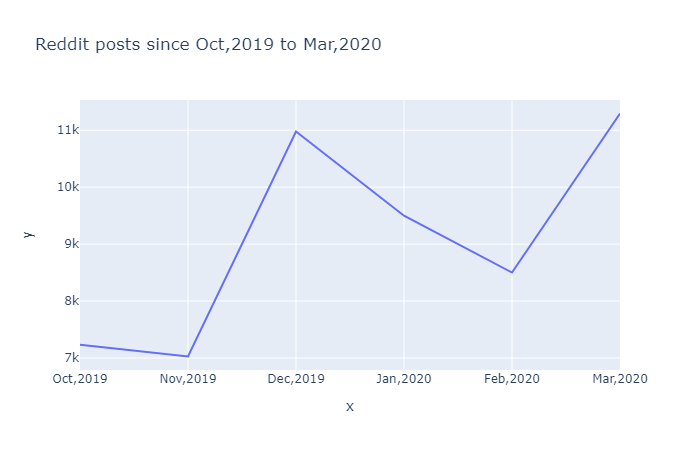

In [62]:
import plotly.express as px

df = px.data.gapminder()
fig = px.line( x= time[1:-1], y=np.sum(time_flair_count.iloc[1:-1],axis = 1), title="Reddit posts since Oct,2019 to Mar,2020",width = 10, height=10)
fig.show("png")

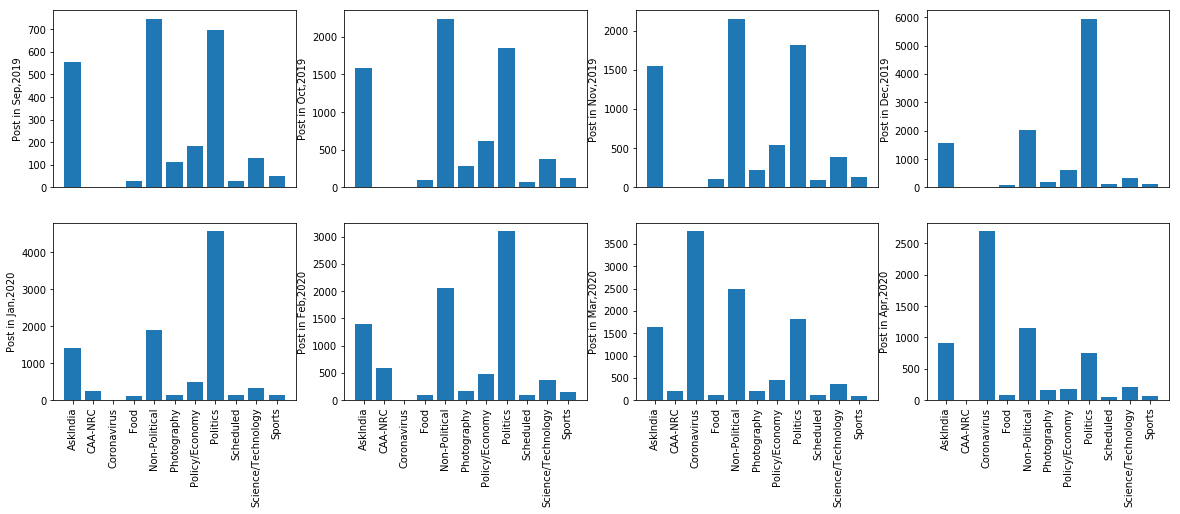

In [49]:
x = range(10)
fig = plt.figure(figsize = (20,15))
#The below code will create 4 plots. The parameters that .subplot take are (row, column, no. of plots).
for i in range(len(time)):
    plt.subplot(4,4,i+1)
    #This will create the bar graph for poulation
    pop = plt.bar(flair, time_flair_count.iloc[i,:].values)
    plt.xticks()
    plt.ylabel('Post in {}'.format(time[i]))
    if i in [4,5,6,7]:
        plt.xticks(flair,  rotation='vertical')
    else:
        plt.xticks([],[] )

plt.show()

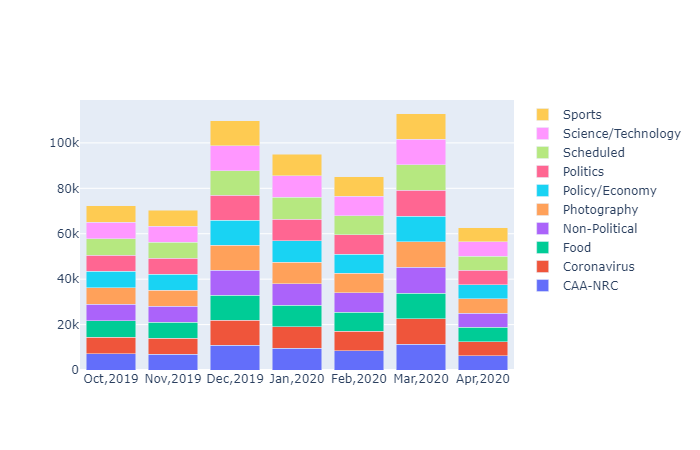

In [65]:
import plotly.graph_objects as go
data = [go.Bar(name = flair[i], x = time[1:],y = np.sum(time_flair_count.iloc[1:,:], axis = 1) ) for i in range(1,len(flair)) ]

fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show("png")

###### NOTE : SEP AND APRIL DATA ARE NOT COMPLETE

In [56]:
from nltk.corpus import stopwords
import nltk
import re
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
stopw = stopwords.words() + ["[deleted]"] + ["[removed]"]
word_count = lambda x: [word for word in word_tokenize(x) if not word in stopwords.words()]
length = []
for d in tqdm(range(df.shape[0])):
    
    t  = df.iloc[d, 1]  if type(df.iloc[d,2]) == float else df.iloc[d,1]+ " " + df.iloc[d,2] 
    t = t.lower()
    word_list = word_count(t)
    length.append(len(word_count(t)))
    string = ' '.join(word[0] for word in word_list)
    with open("Data/reddit.txt","a", encoding = 'utf-8') as txt:
        txt.write(t + "\n")

In [102]:
flair         = np.array(df[["Flair","Upvote","comments","Media"]])
name,Count    = np.unique(flair[:,0].astype(str),return_counts= True)
length_       = np.array(length).reshape(-1, 1).astype(int)
award_upvote  = lambda x : flair[:,1][flair[:,0] == x].sum()
award_comment = lambda x : flair[:,2][flair[:,0] == x].sum()
award_media   = lambda x : flair[:,3][flair[:,0] == x].sum()
# lengt_h       = lambda x : length_[flair[:,0]    == x].sum()

upvote  = np.array(list(map(award_upvote, name))).astype(int)
comment = np.array(list(map(award_comment, name))).astype(int)
media   = np.array(list(map(award_media, name))).astype(int)
# length_ = np.array(list(map(lengt_h, name))).astype(int)
dtype   = {"Count":np.int16,"Upvote":np.int32,"Comments":np.int32,"Media":np.int16}#"Length":np.int64} 
df_flair = pd.DataFrame(np.dstack((Count,upvote,comment,media))[0],dtype= int,index = name, columns=list(dtype.keys()))

df_flair

,Count,Upvote,Comments,Media
AskIndia,10599,151723,102234,1536
CAA-NRC,1057,100588,15292,672
Coronavirus,6473,455012,85253,3364
Food,729,28577,5574,660
Non-Political,14748,868103,153747,8056
Photography,1483,71961,4870,1204
Policy/Economy,3563,167121,27820,1152
Politics,20552,2072174,263698,10524
Scheduled,728,14188,444609,132
Science/Technology,2526,34079,7372,1980


In [103]:
df_flair.to_csv("flair.csv")

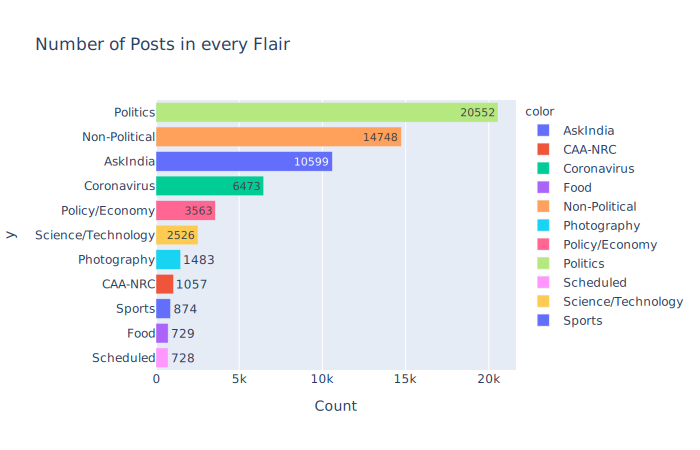

In [104]:
import plotly.express as px
dft = df_flair.iloc[0:25]
fig = px.bar(dft, y=name, x='Count',
             hover_data=['Upvote', 'Comments', "Media"],color = name,title="Number of Posts in every Flair",  text='Count',
             labels={'Flair':name}, height=600, orientation = "h")
fig.update_layout( yaxis={'categoryorder':'max ascending'})

fig.show("svg")

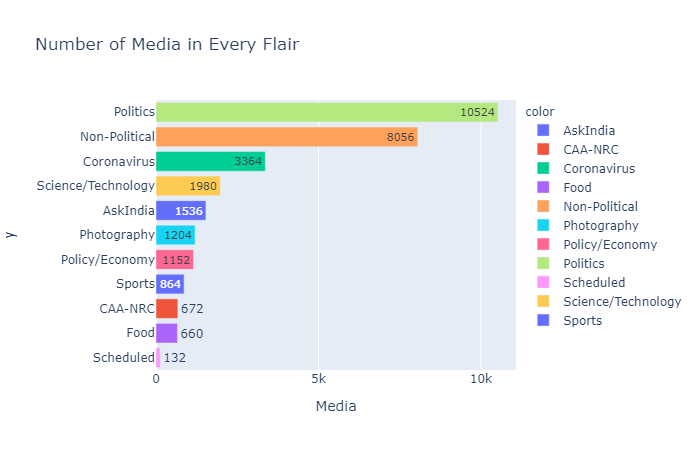

In [106]:
import plotly.express as px
dft = df_flair.iloc[0:25]
fig = px.bar(dft, y=name, x='Media',
             hover_data=['Upvote', 'Comments', "Count"],title = "Number of Media in Every Flair",color = name,  text='Media',
             labels={'Flair':'Flair'}, height=600, orientation = "h",)
fig.update_layout( yaxis={'categoryorder':'max ascending'})
fig.show("png")

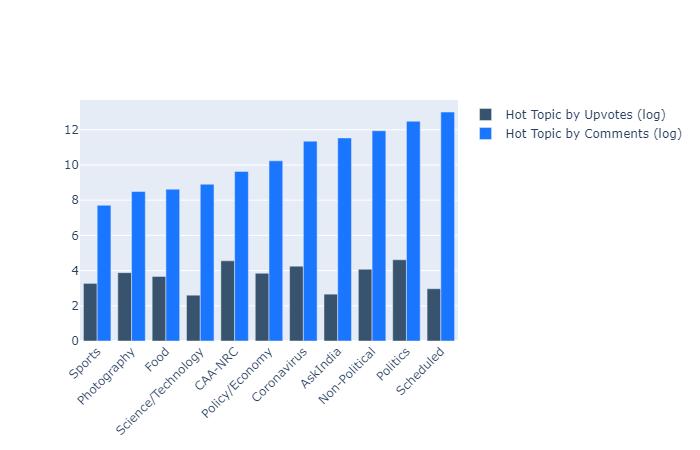

In [107]:
import plotly.graph_objects as go

months = name

fig = go.Figure()
fig.add_trace(go.Bar(
    x=name[0:30],
    y=np.log(upvote[0:30]/Count[0:30]),
    name='Hot Topic by Upvotes (log)',
    marker_color='rgb(55, 83, 109)'
))
fig.add_trace(go.Bar(
    x=name[0:30],
    y=np.log(comment[0:30]),
    name='Hot Topic by Comments (log)',
    marker_color='rgb(26, 118, 255)'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,xaxis={'categoryorder':'max ascending'})
fig.show("png")

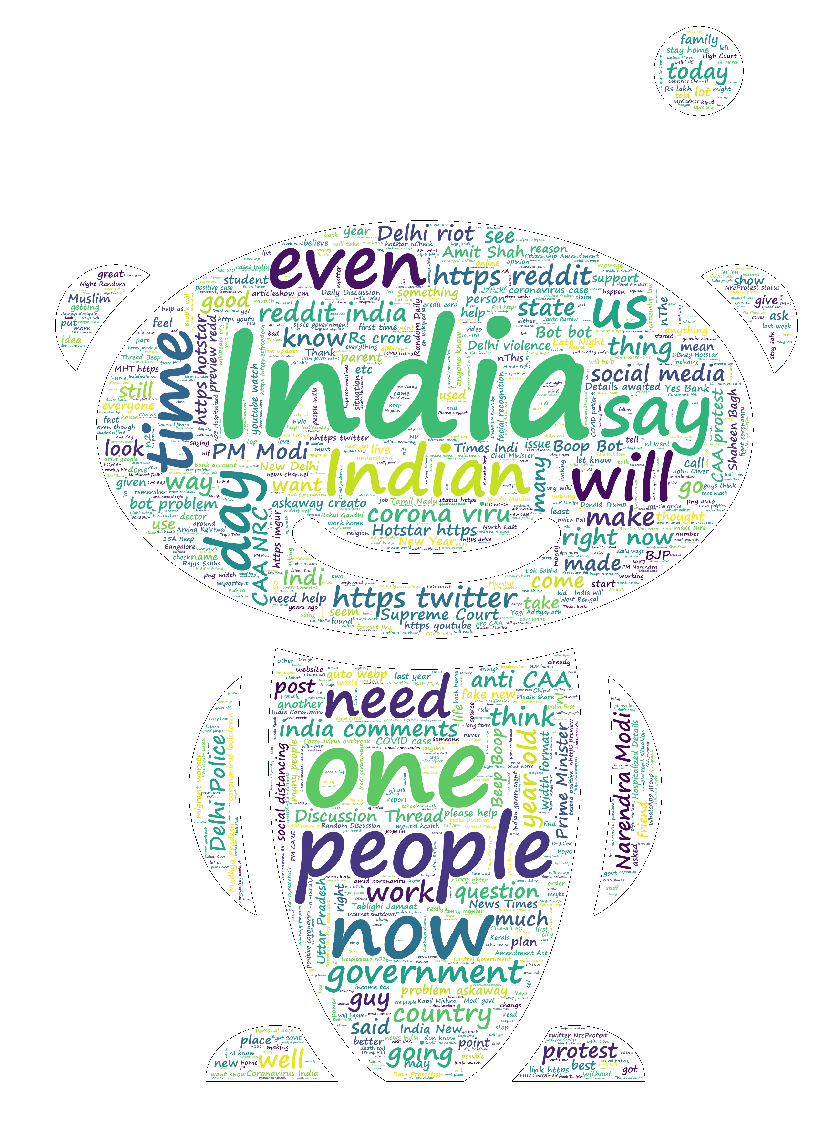

In [5]:
import wordcloud
import cv2
fonts = r"C:\Windows\Fonts\segoeprb.ttf"
stop = wordcloud.STOPWORDS.add("deleted'")
stop = wordcloud.STOPWORDS.add("removed'")
stop = wordcloud.STOPWORDS.add("remove")
stop = wordcloud.STOPWORDS.add("delete")


with open ("Data/reddit.txt", "r",encoding = "utf-8") as file:
    file_content = file.read()

Wordcloud = wordcloud.WordCloud(mask =(255-(cv2.imread("asset/reddit.png")[:,:,0])),
                            stopwords = stop,
                            background_color = 'white',font_path=fonts,
                            width = 1200,
                            height = 1000,
                            max_words=1000,
                            contour_width=1,
                            ).generate(file_content)
plt.figure(figsize = (20,20))
plt.imshow(Wordcloud)
plt.axis('off')
plt.savefig('asset/reddit-gilded-comments-wordcloud.png', bbox_inches='tight');
plt.show()